In [1]:
print('hello marketing folks')

hello marketing folks


### get data

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [22]:
#select the columns i want to work with 
reviews=data[['Title','Review Text','Rating','Division Name','Department Name']]
reviews.head(10)

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses


### processing data 

In [25]:
reviews.columns=reviews.columns.str.lower()

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [33]:
#drop null rows on review text
reviews=reviews.dropna(subset=['review text'])
reviews.shape

(22641, 5)

In [10]:
# descriptive statistics 
reviews.describe()


,rating
count,22641.000000
mean,4.183561
std,1.115762
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
summ_rev=reviews.groupby(['division name', 'department name'])['rating'].mean().sort_values()
summ_rev

division name   department name
General Petite  Trend              3.782609
General         Trend              3.852632
General Petite  Dresses            4.122328
General         Tops               4.136778
                Dresses            4.150318
General Petite  Tops               4.197520
General         Jackets            4.225962
General Petite  Intimate           4.242291
General         Bottoms            4.260727
Initmates       Intimate           4.275596
General Petite  Jackets            4.301587
                Bottoms            4.315226
Name: rating, dtype: float64

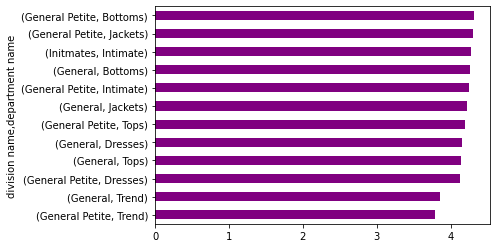

In [14]:
ax=summ_rev.plot.barh(x='rating', y=['division name','department name'], color='purple')


### sentiment analysis - intro to text blob

In [15]:
from textblob import TextBlob

In [16]:
#example from line of duty review 
review=TextBlob("I have to say it is by far the most brilliantly written police drama that the BBC have ever aired")
review.sentiment

Sentiment(polarity=0.4, subjectivity=0.8)

In [18]:
#random example 
review2=TextBlob("marketing is amazing")
review2.sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [26]:
#example from our clothing reviews data - select one cell 
reviews.at[2,'review text']

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [27]:
#complete that example 
review3=TextBlob('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c')

In [28]:
#calc the sentiment 
review3.sentiment

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [30]:
#other things textblob can do 
review3.words

WordList(['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'i', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', 'i', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', 'but', 'the', 'bottom', 'half', 'had', 'a', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', 'net', 'over', 'layers', 'imo', 'a', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', 'it', 'c'])

In [31]:
#other things textblob can do 
review3.sentences

[Sentence("I had such high hopes for this dress and really wanted it to work for me."),
 Sentence("i initially ordered the petite small (my usual size) but i found this to be outrageously small."),
 Sentence("so small in fact that i could not zip it up!"),
 Sentence("i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers."),
 Sentence("imo, a major design flaw was the net over layer sewn directly into the zipper - it c")]

In [32]:
#other things textblob can do 
review3.noun_phrases

WordList(['such high hopes', 'usual size', 'petite medium', 'ok. overall', 'major design flaw', 'layer sewn'])

### sentiment analysis iterating over our review data

In [34]:
# function to repeatedly capture the sentiment 
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [35]:
reviews['sentiment']=reviews['review text'].apply(sentiment).apply(lambda x : x[0])

In [36]:
reviews.head(10)

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,0.178750
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,0.133750
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops,0.171635
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses,0.002500
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses,0.204200


### evaluate the sentiment analysis

In [37]:
reviews.describe()

,rating,sentiment
count,22641.000000,22641.000000
mean,4.183561,0.249824
std,1.115762,0.176679
min,1.000000,-0.975000
25%,4.000000,0.140000
50%,5.000000,0.239399
75%,5.000000,0.350000
max,5.000000,1.000000


In [42]:
#change from mean to min 

sent_summ=reviews.groupby(['division name', 'department name'])['sentiment'].min().sort_values()

In [44]:
sent_summ

division name   department name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Intimate          -0.575000
                Jackets           -0.562500
General         Bottoms           -0.533333
General Petite  Dresses           -0.400000
Initmates       Intimate          -0.392333
General         Trend             -0.270833
General Petite  Bottoms           -0.257778
                Trend             -0.083333
Name: sentiment, dtype: float64

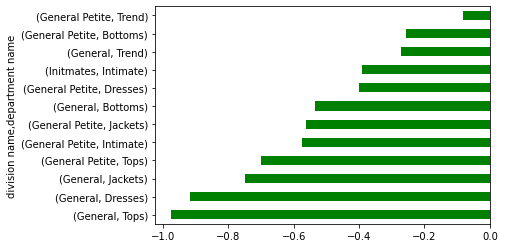

In [45]:
ax=sent_summ.plot.barh(x='sentiment', y=['division name','department name'], color='green')